In [1]:
#Make sure you are using the cmpi6-2019.10 kernel 

#Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys
sys.path.insert(0,'/glade/u/home/abaker/repos/ldcpy')
import ldcpy

#Display output of plots directly in Notebook
%matplotlib inline
#Automatically reload module if it is editted
%reload_ext autoreload
%autoreload 2

#silence warnings
import warnings
warnings.filterwarnings("ignore")

#if you want to use the DASK daskboard on Casper, then modify the below and run
#import dask
#dask.config.set({'distributed.dashboard.link' : 'https://jupyterhub.ucar.edu/dav/user/abaker/proxy/{port}/status'})

#if you want to use the DASK daskboard on Cheyenne, then modify the below and run
import dask
dask.config.set({'distributed.dashboard.link' : 'https://jupyterhub.ucar.edu/ch/user/abaker/proxy/{port}/status'})


In [2]:
from dask.distributed import Client

# for Cheyenne
from dask_jobqueue import PBSCluster

cluster = PBSCluster(
    queue="regular",
    walltime="02:00:00",
    project="NIOW0001",
    memory="109GB",
    resource_spec="select=1:ncpus=9:mem=109GB",
    cores=36,
    processes=9,
)

# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=35)
cluster

In [3]:
from dask.distributed import Client

# Connect client to the remote dask workers
client = Client(cluster)
client

Client Scheduler: tcp://10.148.10.15:43739 Dashboard: https://jupyterhub.ucar.edu/ch/user/abaker/proxy/44473/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
# load the first 86 years of PRECT data
col_PRECT = ldcpy.open_datasets(
    ["PRECT"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/PRECT.daily.19200101-20051231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.PRECT.daily.19200101-20051231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_PRECT

dataset size in GB 13.89



,Array,Chunk
Bytes,13.89 GB,110.59 MB
Shape,"(2, 31390, 192, 288)","(1, 500, 192, 288)"
Count,126 Tasks,126 Chunks
Type,float32,numpy.ndarray


In [ ]:
ldcpy.compare_stats(col_PRECT, "PRECT", "orig", "lossy", time=0)

In [ ]:
#ERROR (log is a problem?)
ldcpy.plot(
    col_PRECT,
    "PRECT",
    sets=["orig", "lossy"],
    metric="mean",
    metric_type="diff",
    plot_type="time_series",
    start = 0,
    end = 365,
    transform = "log"
)

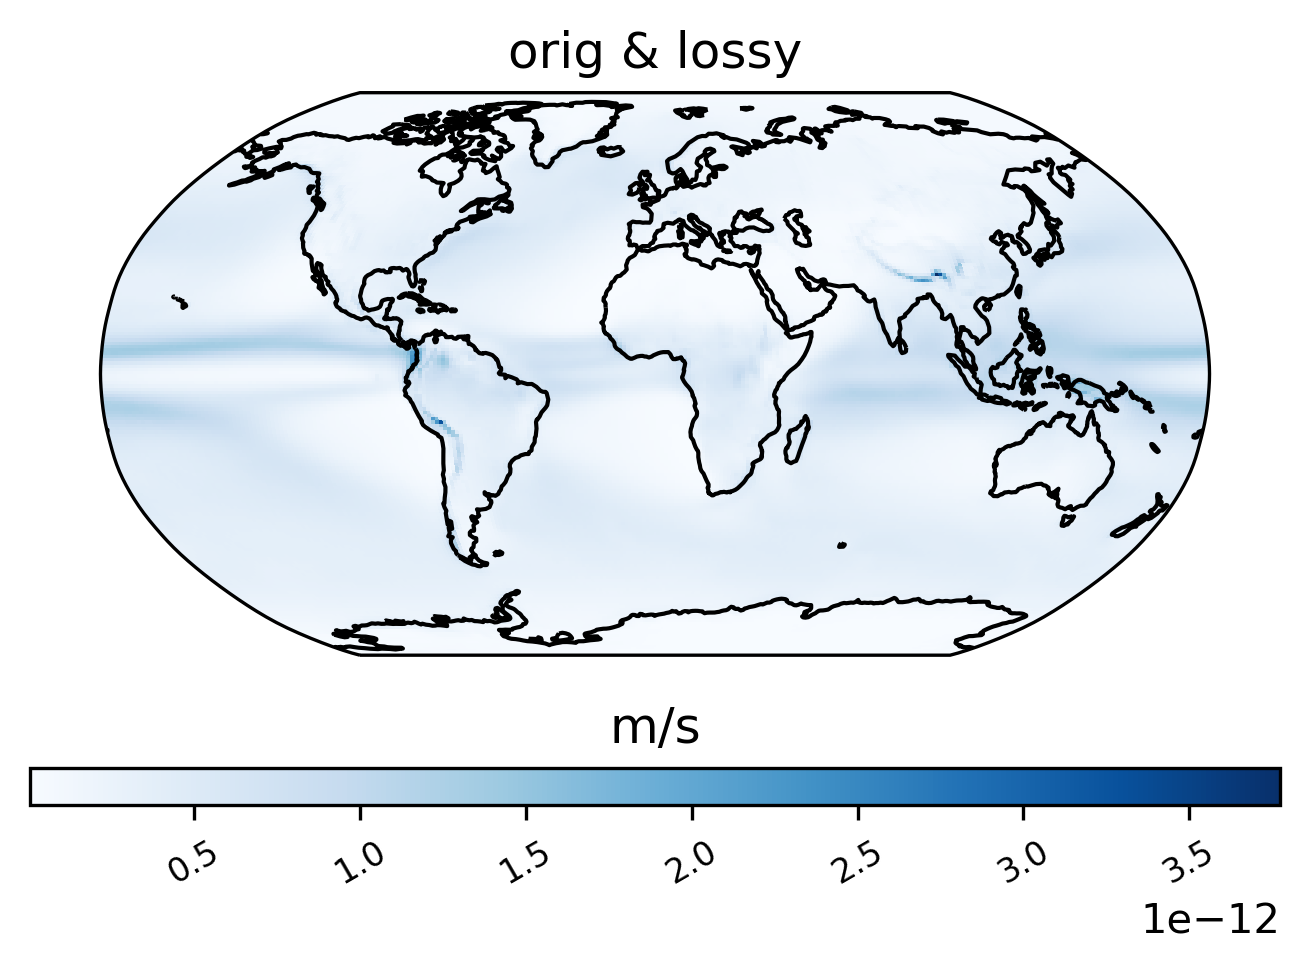

In [5]:
#nice plot
# diff between mean PRECT values across the entire timeseries
ldcpy.plot(
    col_PRECT,
    "PRECT",
    sets=["orig", "lossy"],
    metric="mean",
    metric_type="diff", color = "Blues", short_title=True
)

In [ ]:
#NOT intersting
# compare probability of negative rainfall (and get ssim)
ldcpy.plot(
    col_PRECT,
    "PRECT",
    sets=["orig", "lossy"],
    metric="prob_negative",
    color="binary", calc_ssim = True)

In [ ]:
#nope 
# Time-series plot of PRECT mean in 'orig' dataset
ldcpy.plot(
    col_PRECTś,
    "PRECT",
    sets=["orig", "lossy"],
    metric="mean",
    plot_type="time_series",
    group_by="time.dayofyear",
)

In [6]:
del col_PRECT

In [7]:
# load the first 86 years of daily surface temperature (TS) data - this has been compressed with fpzip
col_TS = ldcpy.open_datasets(
    ["TS"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/TS.daily.19200101-20051231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.TS.daily.19200101-20051231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_TS

dataset size in GB 13.89



,Array,Chunk
Bytes,13.89 GB,110.59 MB
Shape,"(2, 31390, 192, 288)","(1, 500, 192, 288)"
Count,126 Tasks,126 Chunks
Type,float32,numpy.ndarray


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-b091151ed809>", line 6, in <module>
    metric="mae_day_max"
  File "/glade/u/home/abaker/repos/ldcpy/ldcpy/plot.py", line 936, in plot
    mp.spatial_plot(plot_dataset, titles)
  File "/glade/u/home/abaker/repos/ldcpy/ldcpy/plot.py", line 317, in spatial_plot
    if np.isnan(cy_datas).any() or np.isinf(cy_datas).any():
  File "/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/xarray/core/common.py", line 119, in __bool__
    return bool(self.values)
  File "/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/xarray/core/dataarray.py", line 569, in values
    return self.variable.values
  File "/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/xarray/core/variable.py", line 510, in values
    re

TypeError: object of type 'NoneType' has no len()

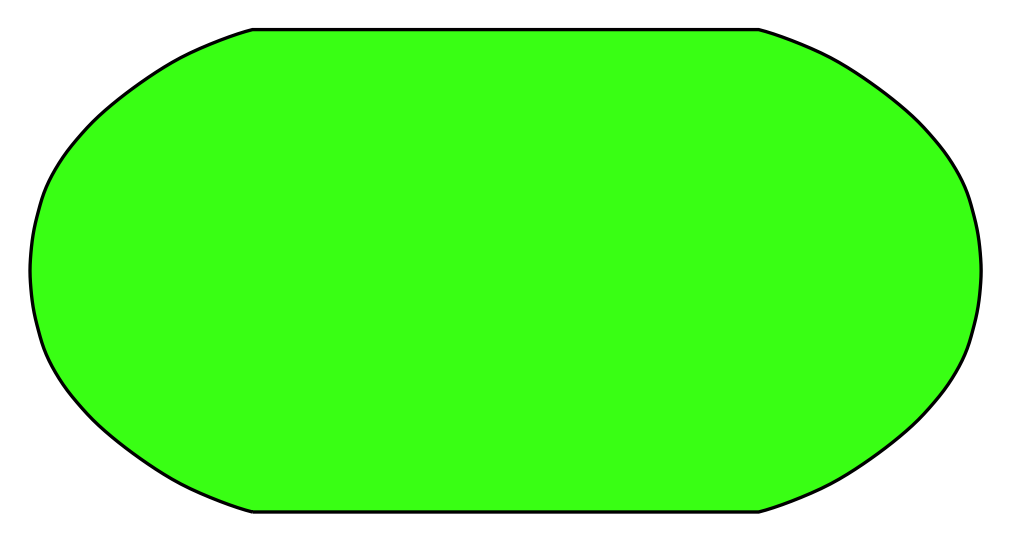

In [8]:
#ERROR - Alex checking
ldcpy.plot(
    col_TS,
    "TS",
    sets=["orig", "lossy"],
    metric="mae_day_max"
)

In [ ]:
ldcpy.plot(
    col_TS,
    "TS",
    sets=["orig", "fpzip"],
    metric="mean",
    metric_type="diff",
    color="YlGn",
)

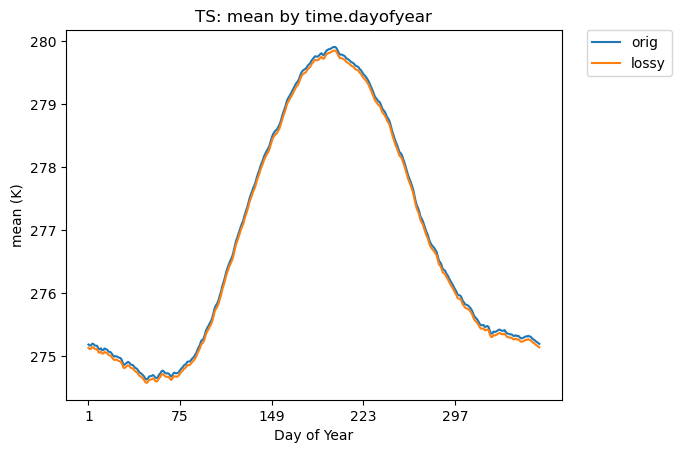

In [9]:
#good plot
# Time-series plot of TS means (grouped by days) in the original and lossy datasets
ldcpy.plot(
    col_TS,
    "TS",
    sets=["orig", "lossy"],
    metric="mean",
    plot_type="time_series",
    group_by="time.dayofyear",
)

In [ ]:
# plot of lag-1 correlation of TS values - first 10 years
ldcpy.plot(
    col_TS,
    "TS",
    sets=["orig", "lossy"],
    metric="corr_lag1", start = 0, end = 800
)

In [ ]:
# load the first 86 years of montly surface pressure into a collection

col_PS = ldcpy.open_datasets(
    ["PS"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/PS.monthly.192001-200512.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.PS.monthly.192001-200512.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_PS

In [ ]:
# diff between mean PS values in col_PS orig and lossy datasets
ldcpy.plot(
    col_PS, "PS", sets=["orig", "lossy"], metric="mean", metric_type="diff", color="YlGn"
)

In [16]:
#U
col_U = ldcpy.open_datasets(
    ["U"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/U.monthly.192001-200512.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.U.monthly.192001-200512.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_U

dataset size in GB 13.70



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lev: 30, lon: 288, time: 1032)
Coordinates:
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    U           (collection, time, lev, lat, lon) float32 dask.array<chunksize=(1, 500, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.B20TRC5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys0219
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...

In [ ]:
#nope
ldcpy.plot(
    col_U,
    "U",
    sets=["orig", "lossy"],
    metric="mean",
    plot_type="time_series", start = 0, end=120
)

In [ ]:
#nope
# Histogram of mean U values in the ds 'orig' dataset
ldcpy.plot(
    col_U, "U", sets=["orig", "lossy"], metric="mean", plot_type="histogram",start = 0,end = 12
)

In [ ]:
#interesting - but don't know what it means
ldcpy.plot(
    col_U,
    "U",
    sets=["orig", "lossy"],
    metric="ns_con_var", metric_type = "diff",
    color = "Blues"
)

In [18]:
# plot of lag-1 correlation of  values - first 10 years
ldcpy.plot(
    col_U,
    "U",
    sets=["orig", "lossy"],
    metric="corr_lag1", start = 0, end = 12
)

KeyboardInterrupt: 

In [22]:
del col_U

In [5]:
col_TMQ = ldcpy.open_datasets(
    ["TMQ"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/TMQ.monthly.192001-200512.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.TMQ.monthly.192001-200512.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_TMQ

dataset size in GB 0.46



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lon: 288, time: 1032)
Coordinates:
  * time        (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    TMQ         (collection, time, lat, lon) float32 dask.array<chunksize=(1, 500, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.B20TRC5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys0219
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...

In [6]:
ldcpy.check_metrics(col_TMQ, "TMQ", "orig", "lossy", time=0)

Evaluating 4 metrics for orig data (set1) and lossy data (set2) :
     PASSED pearson correlation coefficient test...(pcc = 1.00000 )
     *FAILED ks test...(ks p_val = 0.0187 )
     *FAILED spatial relative error test ... (spre = 98.29  %)
     *FAILED SSIM test ... (ssim = 0.99851 )


3

In [25]:
ldcpy.compare_stats(col_TMQ, "TMQ", "orig", "lossy", time=0)

Comparing orig data (set1) to lossy data (set2) at time = 0
 
mean set1: 16.75
mean set2: 16.7
mean diff: 0.04715
 
variance set1: 220
variance set2: 218.8
 
standard deviation set1: 14.83
standard deviation set2: 14.79
 
max value set1: 56.41
max value set2: 56.25
min value set1: 0.5037
min value set2: 0.5
 
max abs diff: 0.25
min abs diff: 0
mean abs diff: 0.04715
mean squared diff: 0.002223
root mean squared diff: 0.07326
normalized root mean squared diff: 0.001311
normalized max pointwise error: 0.004472
pearson correlation coefficient: 1
ks p-value: 0.01869
spatial relative error(% > 0.0001): 98.29
ssim: 0.9985


In [ ]:
ldcpy.plot(
    col_TMQ, "TMQ", sets=["orig", "lossy"], metric="mean", metric_type="diff", color = "YlOrRd"
)

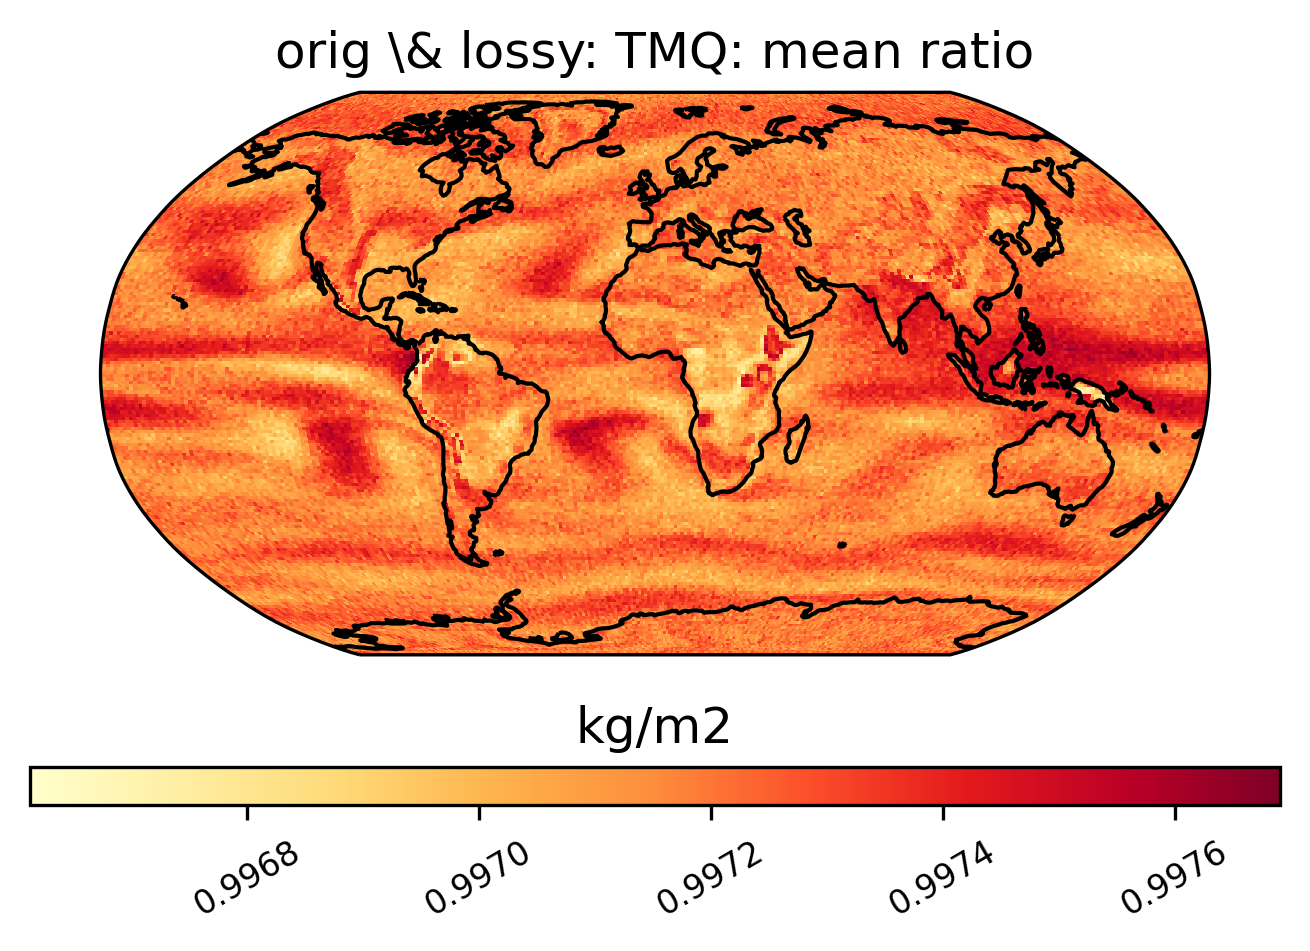

In [5]:
#nice
ldcpy.plot(
    col_TMQ, "TMQ", sets=["orig", "lossy"], metric="mean", metric_type="ratio", color = "YlOrRd"
)

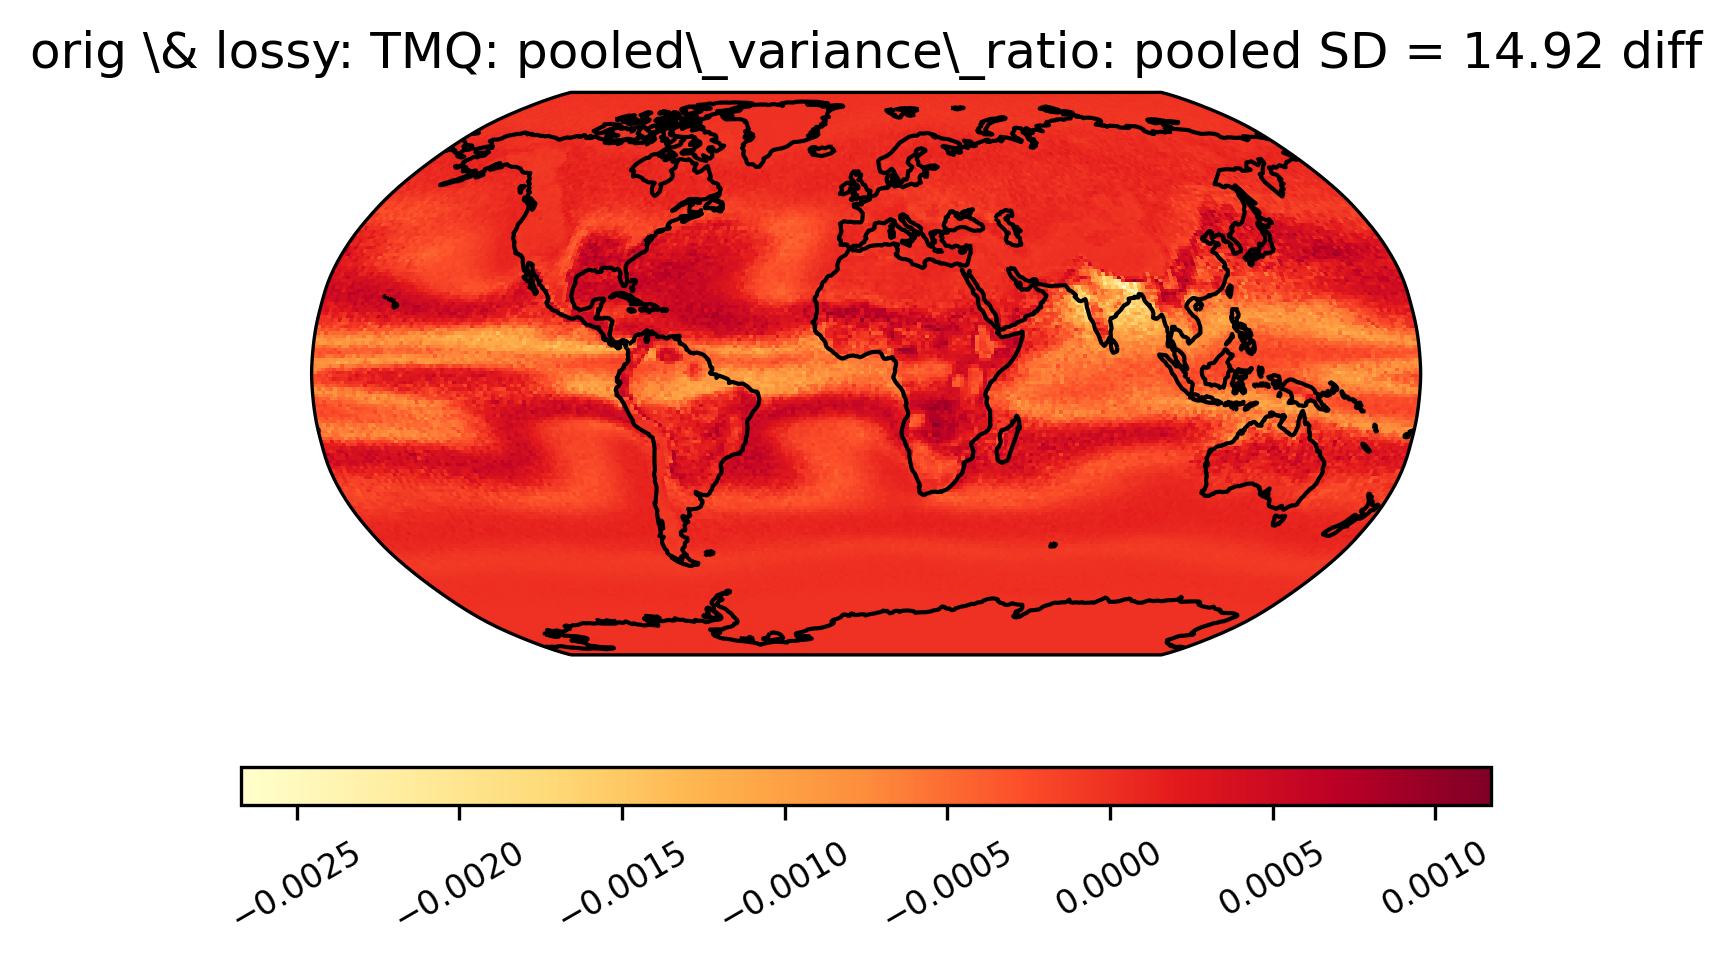

In [9]:
#nice
ldcpy.plot(
    col_TMQ, "TMQ", sets=["orig", "lossy"], metric="pooled_variance_ratio", metric_type = "diff", color = "YlOrRd"
)

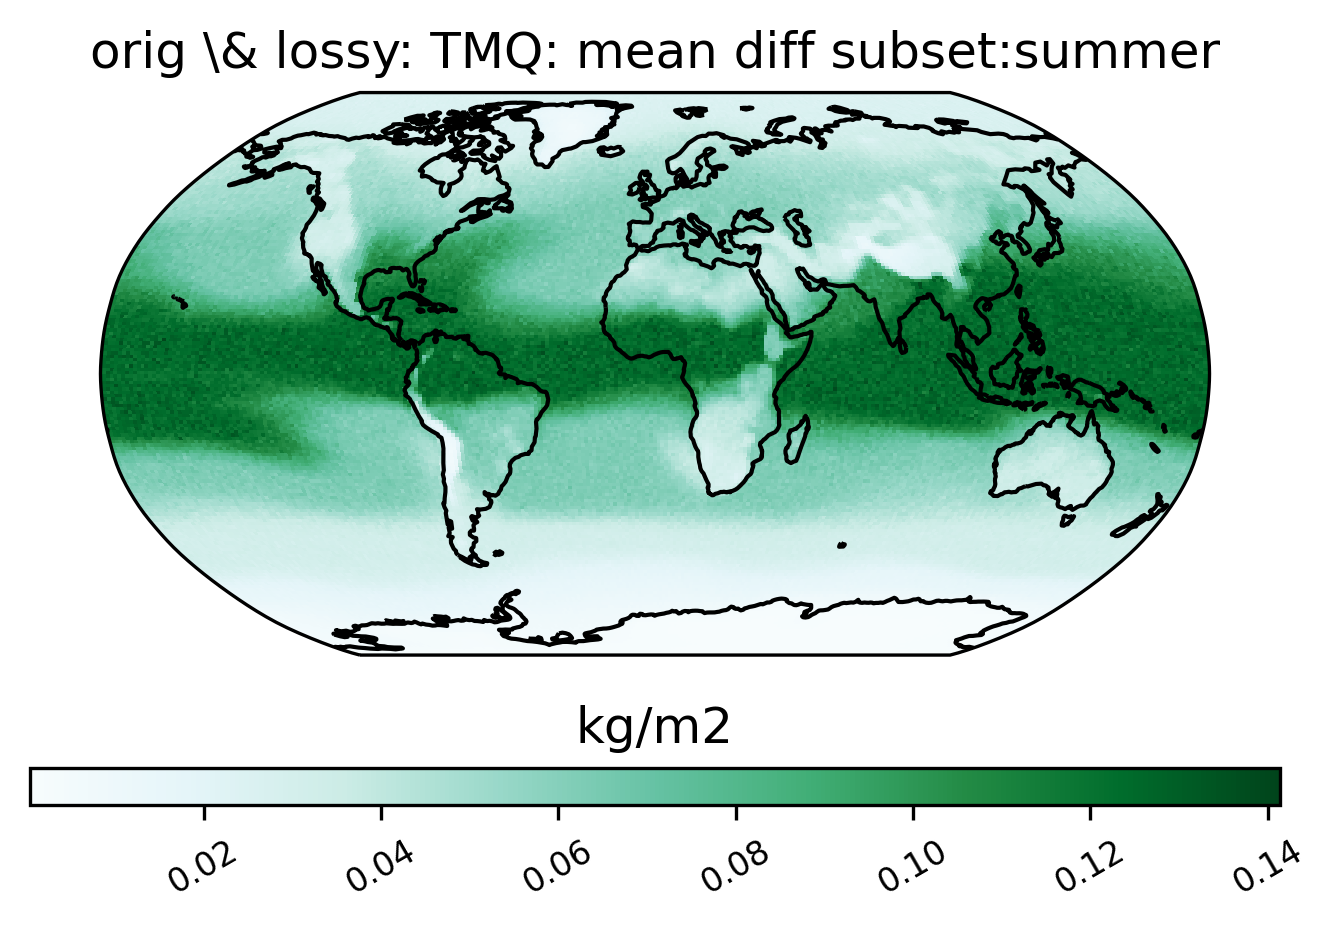

In [10]:
#nice
ldcpy.plot(
    col_TMQ,
    "TMQ",
    sets=["orig", "lossy"],
    metric="mean",
    metric_type = "diff",
    subset = "summer",
    color = "BuGn"
)

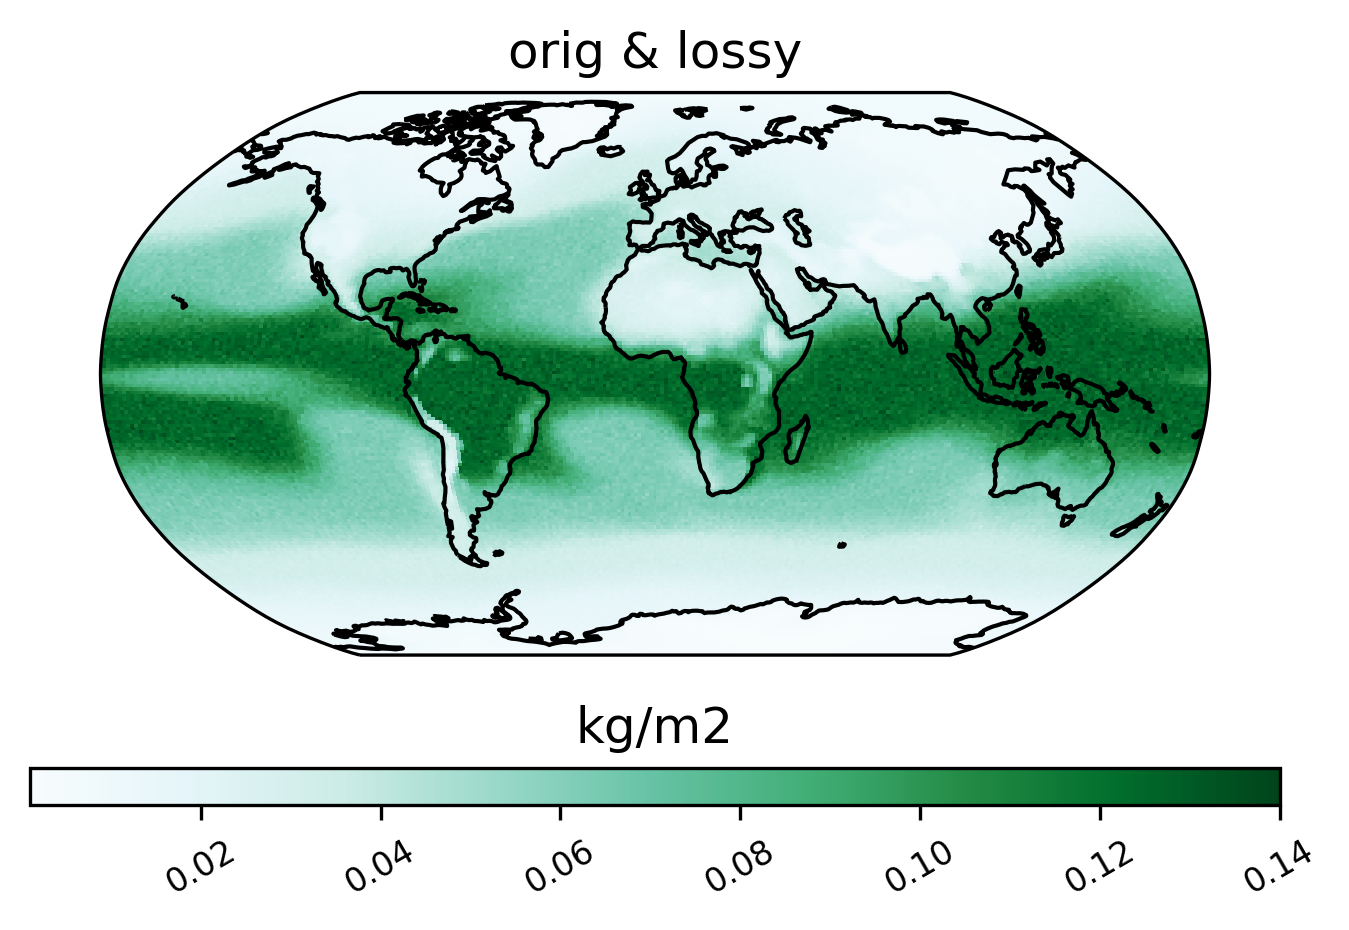

In [13]:
ldcpy.plot(
    col_TMQ,
    "TMQ",
    sets=["orig", "lossy"],
    metric="mean",
    metric_type = "diff",
    subset = "winter",
    color = "BuGn",
    short_title = True
)

In [5]:
col_FLNS = ldcpy.open_datasets(
    ["FLNS"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/FLNS.monthly.192001-200512.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.FLNS.monthly.192001-200512.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_FLNS

dataset size in GB 0.46



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lon: 288, time: 1032)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    FLNS        (collection, time, lat, lon) float32 dask.array<chunksize=(1, 500, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.B20TRC5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys0219
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...

In [8]:
ldcpy.plot(
    col_FLNS,
    "FLNS",
    sets=["orig", "lossy"],
    metric="annual_harmonic_relative_ratio")

ValueError: Dask array only supports taking an FFT along an axis that 
has a single chunk. An FFT operation was tried on axis 0 
which has chunks (500, 500, 32). To change the array's chunks use dask.Array.rechunk.

In [ ]:
cluster.close()
client.close()